In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import pandas as pd
from scipy.special import comb
from itertools import combinations

In [2]:
#defining the basic function for the process we are studying
def simulation(j):
    m = 1
    for _ in range(j):
        m += random.randint(1,2)
        # print(m)
    return m

In [3]:
simulation(24)

35

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


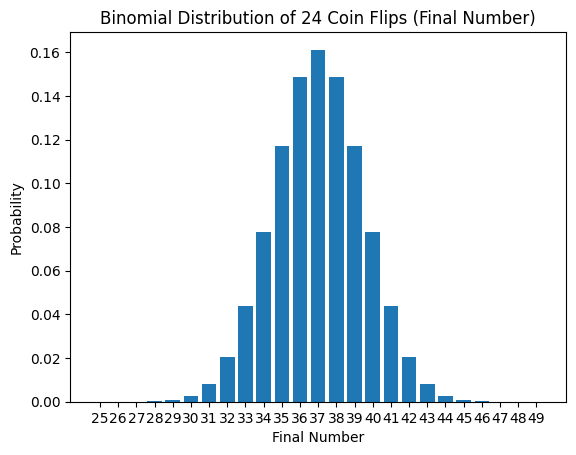

In [4]:
n = 24

# Probability of success (getting heads)
p = 0.5

# Generate x values (number of heads)
x = np.arange(0, n+1)

# Calculate binomial distribution probabilities
binomial_probs = binom.pmf(x, n, p)


x_list = np.zeros_like(x)
for i in range(n+1):
    x_list[i] = 1 + (24-i) + (i)*2

print(x_list)


# Plot the binomial distribution
plt.bar(x_list, binomial_probs)
plt.title('Binomial Distribution of 24 Coin Flips (Final Number)')
plt.xlabel('Final Number')
plt.ylabel('Probability')
plt.xticks(x_list)
plt.show()

In [5]:
#Creating a function that gives the partitions of any number with the maximum number allowed in the partition
# Generate partitions of 24 using only 1s and 2s, ensuring 2s come before 1s. We do this to ensure we do not get reordering of the partitions as then we are more easily able to study them
def generate_partitions(total, max_number):
    # Base case: if total is 0, yield an empty partition
    if total == 0:
        yield []
        return

    # Start with the largest possible number (2 in this case) and work downwards
    for number in range(max_number, 0, -1):
        if number <= total:
            # For each valid number, generate all partitions of the remaining total
            for partition in generate_partitions(total - number, number):
                yield [number] + partition



In [6]:
partitions = list(generate_partitions(24, 2))
# Display the partitions
for partition in partitions:
    print(partition)
print(len(partitions))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
13


In [7]:
# Count the occurrences of 1s and 2s in the partition
def count_ones_and_twos(partition):

    count_2s = partition.count(2)
    count_1s = partition.count(1)
    return (count_2s, count_1s)

In [8]:
for partition in partitions:
    count_2s, count_1s = count_ones_and_twos(partition)
    print(f"Partition: {partition} -> 2s: {count_2s}, 1s: {count_1s}")


Partition: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] -> 2s: 12, 1s: 0
Partition: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1] -> 2s: 11, 1s: 2
Partition: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1] -> 2s: 10, 1s: 4
Partition: [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1] -> 2s: 9, 1s: 6
Partition: [2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 8, 1s: 8
Partition: [2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 7, 1s: 10
Partition: [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 6, 1s: 12
Partition: [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 5, 1s: 14
Partition: [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 4, 1s: 16
Partition: [2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 3, 1s: 18
Partition: [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 2, 1s: 20
Partition: [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> 2s: 1, 1s: 22
Partition: [1, 1, 1, 1, 

In [9]:
#Creating a function that yields compatible F values
def find_valid_k_values(partition):
    count_2s = partition.count(2)
    count_1s = partition.count(1)
    valid_k_values = []

    # Start with k = 25, where all parts are 1s, and decrease the number of 1s while increasing 2s as k increases
    for k in range(25, 50):  # k from 25 to 49
        # Calculate the number of 2s and 1s based on k
        k_2s = k - 25
        k_1s = 49 - k

        # Check if the partition has at most k_2s 2s and at most k_1s 1s
        if k_2s >= count_2s and k_1s >= count_1s:
            valid_k_values.append(k)

    return valid_k_values

In [10]:
partitions = list(generate_partitions(24, 2))

In [11]:
partition_to_valid_ks = {}
for partition in partitions:
    valid_k_values = find_valid_k_values(partition)
    partition_to_valid_ks[len(partition)] = valid_k_values  # Using the length of the partition as the key


In [12]:
# Display the results
for length, valid_ks in partition_to_valid_ks.items():
    print(f"Length of Partition: {length}, Valid k values: {valid_ks}")

Length of Partition: 12, Valid k values: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Length of Partition: 13, Valid k values: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Length of Partition: 14, Valid k values: [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Length of Partition: 15, Valid k values: [34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
Length of Partition: 16, Valid k values: [33, 34, 35, 36, 37, 38, 39, 40, 41]
Length of Partition: 17, Valid k values: [32, 33, 34, 35, 36, 37, 38, 39]
Length of Partition: 18, Valid k values: [31, 32, 33, 34, 35, 36, 37]
Length of Partition: 19, Valid k values: [30, 31, 32, 33, 34, 35]
Length of Partition: 20, Valid k values: [29, 30, 31, 32, 33]
Length of Partition: 21, Valid k values: [28, 29, 30, 31]
Length of Partition: 22, Valid k values: [27, 28, 29]
Length of Partition: 23, Valid k values: [26, 27]
Length of Partition: 24, Valid k values: [25]


In [13]:
# Prepare the data for the DataFrame
data = []
for partition in partitions:
    count_2s, count_1s = count_ones_and_twos(partition)
    valid_k_values = find_valid_k_values(partition)
    data.append({
        'Length of Partition': len(partition),
        'Number of 1s': count_1s,
        'Number of 2s': count_2s,
        'Compatible k Values': valid_k_values
    })


In [14]:
df_partitions = pd.DataFrame(data)
df_partitions

,Length of Partition,Number of 1s,Number of 2s,Compatible k Values
0,12,0,12,"[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4..."
1,13,2,11,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]"
2,14,4,10,"[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]"
3,15,6,9,"[34, 35, 36, 37, 38, 39, 40, 41, 42, 43]"
4,16,8,8,"[33, 34, 35, 36, 37, 38, 39, 40, 41]"
5,17,10,7,"[32, 33, 34, 35, 36, 37, 38, 39]"
6,18,12,6,"[31, 32, 33, 34, 35, 36, 37]"
7,19,14,5,"[30, 31, 32, 33, 34, 35]"
8,20,16,4,"[29, 30, 31, 32, 33]"
9,21,18,3,"[28, 29, 30, 31]"


In [15]:
def calculate_nCr(row):
    return comb(row['Length of Partition'], row['Number of 2s'], exact=True)

In [16]:
# Add 'nCr' column to the DataFrame
df_partitions['nCr'] = df_partitions.apply(calculate_nCr, axis=1)

# Display the updated DataFrame
df_partitions

,Length of Partition,Number of 1s,Number of 2s,Compatible k Values,nCr
0,12,0,12,"[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...",1
1,13,2,11,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]",78
2,14,4,10,"[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]",1001
3,15,6,9,"[34, 35, 36, 37, 38, 39, 40, 41, 42, 43]",5005
4,16,8,8,"[33, 34, 35, 36, 37, 38, 39, 40, 41]",12870
5,17,10,7,"[32, 33, 34, 35, 36, 37, 38, 39]",19448
6,18,12,6,"[31, 32, 33, 34, 35, 36, 37]",18564
7,19,14,5,"[30, 31, 32, 33, 34, 35]",11628
8,20,16,4,"[29, 30, 31, 32, 33]",4845
9,21,18,3,"[28, 29, 30, 31]",1330


In [17]:
# Prepare the data for the new DataFrame
data_equations = []
for k in range(25, 50):  # k from 25 to 49
    k_adj = k - 1  # Adjust k by subtracting 1
    x = k_adj - 24  # Calculate x based on adjusted k
    y = 48 - k_adj  # Calculate y based on adjusted k
    data_equations.append({'k': k_adj+1, 'x (Number of 2s)': x, 'y (Number of 1s)': y})

# Create the DataFrame for the system of equations
df_equations = pd.DataFrame(data_equations)

# Display the new DataFrame
df_equations

,k,x (Number of 2s),y (Number of 1s)
0,25,0,24
1,26,1,23
2,27,2,22
3,28,3,21
4,29,4,20
5,30,5,19
6,31,6,18
7,32,7,17
8,33,8,16
9,34,9,15


In [18]:
# Initialize an empty list to store the combined data
combined_data = []

# Iterate through each row in df_eqns
for index, eq_row in df_equations.iterrows():
    k_value = eq_row['k']

    # Find partitions in df_partitions that are compatible with this k value
    compatible_partitions = df_partitions[df_partitions['Compatible k Values'].apply(lambda ks: k_value in ks)]

    # For each compatible partition, create a new row in the combined data
    for _, part_row in compatible_partitions.iterrows():
        combined_data.append({
            'k': k_value,
            'x (Number of 2s)': eq_row['x (Number of 2s)'],
            'y (Number of 1s)': eq_row['y (Number of 1s)'],
            'Partition Length': part_row['Length of Partition'],
            'Number of 1s in Partition': part_row['Number of 1s'],
            'Number of 2s in Partition': part_row['Number of 2s'],
        })

# Create the combined DataFrame
df_combined = pd.DataFrame(combined_data)

# Display the combined DataFrame
df_combined


,k,x (Number of 2s),y (Number of 1s),Partition Length,Number of 1s in Partition,Number of 2s in Partition
0,25,0,24,24,24,0
1,26,1,23,23,22,1
2,27,2,22,22,20,2
3,27,2,22,23,22,1
4,28,3,21,21,18,3
...,...,...,...,...,...,...
86,46,21,3,13,2,11
87,47,22,2,12,0,12
88,47,22,2,13,2,11
89,48,23,1,12,0,12


In [19]:
# Iterate through the combined_data list
for entry in combined_data:
    # Find the corresponding row in df_partitions using the partition details (e.g., length, number of 1s, number of 2s)
    partition_row = df_partitions[
        (df_partitions['Length of Partition'] == entry['Partition Length']) &
        (df_partitions['Number of 1s'] == entry['Number of 1s in Partition']) &
        (df_partitions['Number of 2s'] == entry['Number of 2s in Partition'])
    ].iloc[0]  # Assuming there's always at least one matching row

    # Update the entry in combined_data with the nCr value from the matching row in df_partitions
    entry['Partition nCr'] = partition_row['nCr']

# Now that combined_data has been updated, create or update the DataFrame
df_combined = pd.DataFrame(combined_data)

# Display the updated DataFrame
df_combined

,k,x (Number of 2s),y (Number of 1s),Partition Length,Number of 1s in Partition,Number of 2s in Partition,Partition nCr
0,25,0,24,24,24,0,1
1,26,1,23,23,22,1,23
2,27,2,22,22,20,2,231
3,27,2,22,23,22,1,23
4,28,3,21,21,18,3,1330
...,...,...,...,...,...,...,...
86,46,21,3,13,2,11,78
87,47,22,2,12,0,12,1
88,47,22,2,13,2,11,78
89,48,23,1,12,0,12,1


In [20]:
# Function to calculate the factorial expression
def calculate_expression(row):
    g = 24 - row['Partition Length']
    h = row['y (Number of 1s)'] - row['Number of 1s in Partition']
    # Using comb to calculate g choose h, which is equivalent to g! / (h!(g-h)!)
    return comb(g, h, exact=True)

# Apply the function to each row in df_combined to calculate the expression and create a new column 'Expression Value'
df_combined['P\''] = df_combined.apply(calculate_expression, axis=1)

# Display the updated DataFrame
df_combined

,k,x (Number of 2s),y (Number of 1s),Partition Length,Number of 1s in Partition,Number of 2s in Partition,Partition nCr,P'
0,25,0,24,24,24,0,1,1
1,26,1,23,23,22,1,23,1
2,27,2,22,22,20,2,231,1
3,27,2,22,23,22,1,23,1
4,28,3,21,21,18,3,1330,1
...,...,...,...,...,...,...,...,...
86,46,21,3,13,2,11,78,11
87,47,22,2,12,0,12,1,66
88,47,22,2,13,2,11,78,1
89,48,23,1,12,0,12,1,12


In [21]:
df_combined['nCr * P\''] = df_combined['Partition nCr'] * df_combined['P\'']

# Display the updated DataFrame with the new column
df_combined

,k,x (Number of 2s),y (Number of 1s),Partition Length,Number of 1s in Partition,Number of 2s in Partition,Partition nCr,P',nCr * P'
0,25,0,24,24,24,0,1,1,1
1,26,1,23,23,22,1,23,1,23
2,27,2,22,22,20,2,231,1,231
3,27,2,22,23,22,1,23,1,23
4,28,3,21,21,18,3,1330,1,1330
...,...,...,...,...,...,...,...,...,...
86,46,21,3,13,2,11,78,11,858
87,47,22,2,12,0,12,1,66,66
88,47,22,2,13,2,11,78,1,78
89,48,23,1,12,0,12,1,12,12


In [22]:
df_k_sum = df_combined.groupby('k')['nCr * P\''].sum().reset_index()

# Rename the columns for clarity
df_k_sum.columns = ['k', 'Sum of nCr * P\'']

# Display the new DataFrame
df_k_sum

,k,Sum of nCr * P'
0,25,1
1,26,23
2,27,254
3,28,1792
4,29,9066
5,30,34998
6,31,107104
7,32,266492
8,33,548591
9,34,945793


In [23]:
# Aggregate 'y (Number of 1s)' and 'x (Number of 2s)' for each k value
counts_per_k = df_combined.groupby('k').agg({
    'y (Number of 1s)': 'first',
    'x (Number of 2s)': 'first'
}).reset_index()

# Merge the aggregated counts into df_k_sum
df_k_sum_enriched = pd.merge(df_k_sum, counts_per_k, how='left', on='k')

# Rename columns for clarity
df_k_sum_enriched.rename(columns={'y (Number of 1s)': 'Count of 1s', 'x (Number of 2s)': 'Count of 2s'}, inplace=True)

# Display the enriched DataFrame
df_k_sum_enriched


,k,Sum of nCr * P',Count of 1s,Count of 2s
0,25,1,24,0
1,26,23,23,1
2,27,254,22,2
3,28,1792,21,3
4,29,9066,20,4
5,30,34998,19,5
6,31,107104,18,6
7,32,266492,17,7
8,33,548591,16,8
9,34,945793,15,9


In [24]:
# Calculate the binomial coefficient for each row and add it as a new column
df_k_sum_enriched['24 Choose r'] = df_k_sum_enriched['Count of 2s'].apply(lambda r: comb(24, r, exact=True))

# Display the updated DataFrame
df_k_sum_enriched

,k,Sum of nCr * P',Count of 1s,Count of 2s,24 Choose r
0,25,1,24,0,1
1,26,23,23,1,24
2,27,254,22,2,276
3,28,1792,21,3,2024
4,29,9066,20,4,10626
5,30,34998,19,5,42504
6,31,107104,18,6,134596
7,32,266492,17,7,346104
8,33,548591,16,8,735471
9,34,945793,15,9,1307504


In [25]:
df_k_sum_enriched['Fraction'] = df_k_sum_enriched.apply(lambda row: row['Sum of nCr * P\''] / row['24 Choose r'] if row['24 Choose r'] != 0 else 0, axis=1)

df_k_sum_enriched

,k,Sum of nCr * P',Count of 1s,Count of 2s,24 Choose r,Fraction
0,25,1,24,0,1,1.000000
1,26,23,23,1,24,0.958333
2,27,254,22,2,276,0.920290
3,28,1792,21,3,2024,0.885375
4,29,9066,20,4,10626,0.853190
5,30,34998,19,5,42504,0.823405
6,31,107104,18,6,134596,0.795744
7,32,266492,17,7,346104,0.769977
8,33,548591,16,8,735471,0.745904
9,34,945793,15,9,1307504,0.723358


In [26]:
# Calculate the total sum of '24 Choose r' values
total_24_choose_r = df_k_sum_enriched['24 Choose r'].sum()

# Calculate the fraction for each row and add it as a new column '24 Choose r Fraction'
df_k_sum_enriched['24 Choose r Fraction'] = df_k_sum_enriched['24 Choose r'] / total_24_choose_r

# Display the updated DataFrame
df_k_sum_enriched

,k,Sum of nCr * P',Count of 1s,Count of 2s,24 Choose r,Fraction,24 Choose r Fraction
0,25,1,24,0,1,1.000000,5.960464e-08
1,26,23,23,1,24,0.958333,1.430511e-06
2,27,254,22,2,276,0.920290,1.645088e-05
3,28,1792,21,3,2024,0.885375,1.206398e-04
4,29,9066,20,4,10626,0.853190,6.333590e-04
5,30,34998,19,5,42504,0.823405,2.533436e-03
6,31,107104,18,6,134596,0.795744,8.022547e-03
7,32,266492,17,7,346104,0.769977,2.062941e-02
8,33,548591,16,8,735471,0.745904,4.383749e-02
9,34,945793,15,9,1307504,0.723358,7.793331e-02


In [27]:
# Multiply 'Fraction' by '24 Choose r Fraction' and add the result as a new column 'Combined Fraction'
df_k_sum_enriched['Combined Fraction'] = df_k_sum_enriched['Fraction'] * df_k_sum_enriched['24 Choose r Fraction']

# Display the updated DataFrame
df_k_sum_enriched


,k,Sum of nCr * P',Count of 1s,Count of 2s,24 Choose r,Fraction,24 Choose r Fraction,Combined Fraction
0,25,1,24,0,1,1.000000,5.960464e-08,5.960464e-08
1,26,23,23,1,24,0.958333,1.430511e-06,1.370907e-06
2,27,254,22,2,276,0.920290,1.645088e-05,1.513958e-05
3,28,1792,21,3,2024,0.885375,1.206398e-04,1.068115e-04
4,29,9066,20,4,10626,0.853190,6.333590e-04,5.403757e-04
5,30,34998,19,5,42504,0.823405,2.533436e-03,2.086043e-03
6,31,107104,18,6,134596,0.795744,8.022547e-03,6.383896e-03
7,32,266492,17,7,346104,0.769977,2.062941e-02,1.588416e-02
8,33,548591,16,8,735471,0.745904,4.383749e-02,3.269857e-02
9,34,945793,15,9,1307504,0.723358,7.793331e-02,5.637366e-02


In [28]:
total_25 = df_k_sum_enriched['Combined Fraction'].sum()

In [29]:
print(total_25)

0.6666666865348816


In [30]:
#Function to simulate multiple walks to analyse only the landing or non-landing on 25
def break_25(j, n):
    count_reached_25 = 0
    for _ in range(j):
        m = 1  # Start at position 1 for each simulation
        for flip in range(n):  # Perform exactly n flips
            m += random.randint(1, 2)
            if m == 25:
                count_reached_25 += 1
                break  # Stop this simulation if 25 is reached
            elif m > 27:
                break  # Stop this simulation if position goes beyond 27

    return count_reached_25

# Example usage: simulate 10,000 trials
trials = [10,100,500,1000,5000,10000,50000, 100000]
flips = 24
for trials in trials:
   count = break_25(trials,flips)
   print("Number of trials:", trials, "probability:", count/trials)

Number of trials: 10 probability: 0.9
Number of trials: 100 probability: 0.67
Number of trials: 500 probability: 0.716
Number of trials: 1000 probability: 0.661
Number of trials: 5000 probability: 0.672
Number of trials: 10000 probability: 0.6689
Number of trials: 50000 probability: 0.66688
Number of trials: 100000 probability: 0.6668


In [31]:
import pandas as pd
from itertools import combinations

def update_frequencies(sequence, frequency):
    cumulative_sum = 0
    for step in sequence:
        cumulative_sum += step
        frequency[cumulative_sum] += 1

def generate_frequencies(num_steps):
    # Initialize frequency dictionary for all possible sums from 1 to 48
    frequency = {i: 0 for i in range(1, num_steps*2 + 1)}

    # Start with the sequence of all 2s
    base_sequence = [2] * num_steps
    update_frequencies(base_sequence, frequency)

    # Iteratively introduce 1s and update frequencies
    for num_ones in range(1, num_steps + 1):
        for positions in combinations(range(num_steps), num_ones):
            sequence = base_sequence.copy()
            for pos in positions:
                sequence[pos] = 1  # Place 1 at the specified position
            update_frequencies(sequence, frequency)

    return frequency

# Generate the frequencies for sequences of length 24
frequencies = generate_frequencies(24)

# Convert the frequencies dictionary to a pandas DataFrame
frequencies_df = pd.DataFrame(list(frequencies.items()), columns=['Sum', 'Frequency'])

# Display the DataFrame
print(frequencies_df)



    Sum  Frequency
0     1    8388608
1     2   12582912
2     3   10485760
3     4   11534336
4     5   11010048
5     6   11272192
6     7   11141120
7     8   11206656
8     9   11173888
9    10   11190272
10   11   11182080
11   12   11186176
12   13   11184128
13   14   11185152
14   15   11184640
15   16   11184896
16   17   11184768
17   18   11184832
18   19   11184800
19   20   11184816
20   21   11184808
21   22   11184812
22   23   11184810
23   24   11184811
24   25   11184810
25   26   11184798
26   27   11184654
27   28   11183576
28   29   11177790
29   30   11154118
30   31   11077404
31   32   10875411
32   33   10435620
33   34    9634028
34   35    8400444
35   36    6788536
36   37    4994340
37   38    3291288
38   39    1914114
39   40     968321
40   41     419730
41   42     153238
42   43      46134
43   44      11136
44   45       2070
45   46        278
46   47         24
47   48          1


In [32]:
frequencies_df['Sum'] = frequencies_df['Sum'] + 1
print(frequencies_df)

    Sum  Frequency
0     2    8388608
1     3   12582912
2     4   10485760
3     5   11534336
4     6   11010048
5     7   11272192
6     8   11141120
7     9   11206656
8    10   11173888
9    11   11190272
10   12   11182080
11   13   11186176
12   14   11184128
13   15   11185152
14   16   11184640
15   17   11184896
16   18   11184768
17   19   11184832
18   20   11184800
19   21   11184816
20   22   11184808
21   23   11184812
22   24   11184810
23   25   11184811
24   26   11184810
25   27   11184798
26   28   11184654
27   29   11183576
28   30   11177790
29   31   11154118
30   32   11077404
31   33   10875411
32   34   10435620
33   35    9634028
34   36    8400444
35   37    6788536
36   38    4994340
37   39    3291288
38   40    1914114
39   41     968321
40   42     419730
41   43     153238
42   44      46134
43   45      11136
44   46       2070
45   47        278
46   48         24
47   49          1


In [33]:
frequencies_df['Probability'] = frequencies_df['Frequency'] / (2 ** 24)
print(frequencies_df)

    Sum  Frequency   Probability
0     2    8388608  5.000000e-01
1     3   12582912  7.500000e-01
2     4   10485760  6.250000e-01
3     5   11534336  6.875000e-01
4     6   11010048  6.562500e-01
5     7   11272192  6.718750e-01
6     8   11141120  6.640625e-01
7     9   11206656  6.679688e-01
8    10   11173888  6.660156e-01
9    11   11190272  6.669922e-01
10   12   11182080  6.665039e-01
11   13   11186176  6.667480e-01
12   14   11184128  6.666260e-01
13   15   11185152  6.666870e-01
14   16   11184640  6.666565e-01
15   17   11184896  6.666718e-01
16   18   11184768  6.666641e-01
17   19   11184832  6.666679e-01
18   20   11184800  6.666660e-01
19   21   11184816  6.666670e-01
20   22   11184808  6.666665e-01
21   23   11184812  6.666667e-01
22   24   11184810  6.666666e-01
23   25   11184811  6.666667e-01
24   26   11184810  6.666666e-01
25   27   11184798  6.666659e-01
26   28   11184654  6.666573e-01
27   29   11183576  6.665931e-01
28   30   11177790  6.662482e-01
29   31   

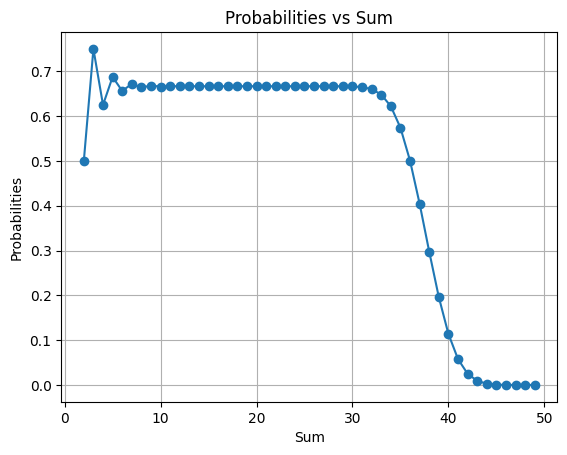

In [34]:
# Assuming frequencies_df is your DataFrame with columns 'Probabilities' and 'Sum'

# Plotting Probabilities against Sum
plt.plot(frequencies_df['Sum'], frequencies_df['Probability'], marker='o', linestyle='-')
plt.xlabel('Sum')
plt.ylabel('Probabilities')
plt.title('Probabilities vs Sum')
plt.grid(True)
plt.show()

In [35]:
# Assuming frequencies_df is your DataFrame with the 'Probability' column

# Calculate the difference between each entry and its previous entry in the 'Probability' column
frequencies_df['Difference'] = frequencies_df['Probability'].diff()

# Print the updated DataFrame
print(frequencies_df)


    Sum  Frequency   Probability    Difference
0     2    8388608  5.000000e-01           NaN
1     3   12582912  7.500000e-01  2.500000e-01
2     4   10485760  6.250000e-01 -1.250000e-01
3     5   11534336  6.875000e-01  6.250000e-02
4     6   11010048  6.562500e-01 -3.125000e-02
5     7   11272192  6.718750e-01  1.562500e-02
6     8   11141120  6.640625e-01 -7.812500e-03
7     9   11206656  6.679688e-01  3.906250e-03
8    10   11173888  6.660156e-01 -1.953125e-03
9    11   11190272  6.669922e-01  9.765625e-04
10   12   11182080  6.665039e-01 -4.882812e-04
11   13   11186176  6.667480e-01  2.441406e-04
12   14   11184128  6.666260e-01 -1.220703e-04
13   15   11185152  6.666870e-01  6.103516e-05
14   16   11184640  6.666565e-01 -3.051758e-05
15   17   11184896  6.666718e-01  1.525879e-05
16   18   11184768  6.666641e-01 -7.629395e-06
17   19   11184832  6.666679e-01  3.814697e-06
18   20   11184800  6.666660e-01 -1.907349e-06
19   21   11184816  6.666670e-01  9.536743e-07
20   22   111

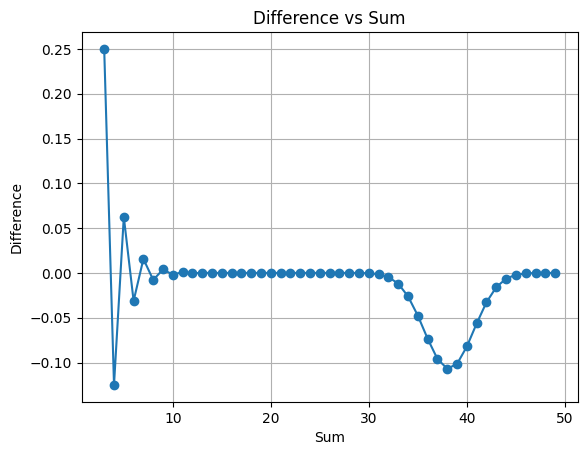

    Sum  Frequency   Probability    Difference
0     2    8388608  5.000000e-01           NaN
1     3   12582912  7.500000e-01  2.500000e-01
2     4   10485760  6.250000e-01 -1.250000e-01
3     5   11534336  6.875000e-01  6.250000e-02
4     6   11010048  6.562500e-01 -3.125000e-02
5     7   11272192  6.718750e-01  1.562500e-02
6     8   11141120  6.640625e-01 -7.812500e-03
7     9   11206656  6.679688e-01  3.906250e-03
8    10   11173888  6.660156e-01 -1.953125e-03
9    11   11190272  6.669922e-01  9.765625e-04
10   12   11182080  6.665039e-01 -4.882812e-04
11   13   11186176  6.667480e-01  2.441406e-04
12   14   11184128  6.666260e-01 -1.220703e-04
13   15   11185152  6.666870e-01  6.103516e-05
14   16   11184640  6.666565e-01 -3.051758e-05
15   17   11184896  6.666718e-01  1.525879e-05
16   18   11184768  6.666641e-01 -7.629395e-06
17   19   11184832  6.666679e-01  3.814697e-06
18   20   11184800  6.666660e-01 -1.907349e-06
19   21   11184816  6.666670e-01  9.536743e-07
20   22   111

In [36]:
# Assuming frequencies_df is your DataFrame with columns 'Probabilities' and 'Sum'

# Plotting Probabilities against Sum
plt.plot(frequencies_df['Sum'], frequencies_df['Difference'], marker='o', linestyle='-')
plt.xlabel('Sum')
plt.ylabel('Difference')
plt.title('Difference vs Sum')
plt.grid(True)
plt.show()
# Calculate the difference between each entry and its previous entry in the 'Probabilities' column
frequencies_df['Difference'] = frequencies_df['Probability'].diff()

# Print the updated DataFrame
print(frequencies_df)
# Assuming frequencies_df is your DataFrame with the 'Probability' column

# Calculate the difference between each entry and its previous entry in the 'Probability' column
frequencies_df['Difference'] = frequencies_df['Probability'].diff()


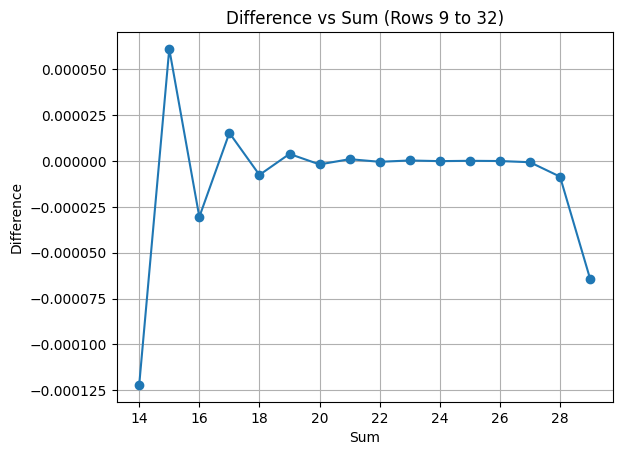

In [37]:
# Extract the subset of rows from index 9 to 32
subset_df = frequencies_df.iloc[12:28]

# Plotting Difference against Sum for the subset of rows
plt.plot(subset_df['Sum'], subset_df['Difference'], marker='o', linestyle='-')
plt.xlabel('Sum')
plt.ylabel('Difference')
plt.title('Difference vs Sum (Rows 9 to 32)')
plt.grid(True)
plt.show()

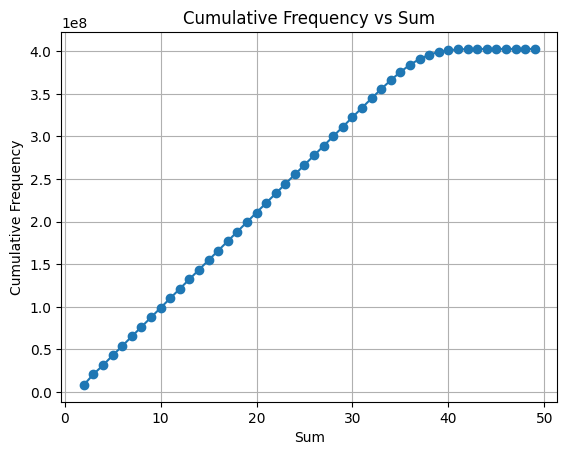

In [38]:
cumulative_frequency = frequencies_df['Frequency'].cumsum()

# Plotting Cumulative Frequency against Sum
plt.plot(frequencies_df['Sum'], cumulative_frequency, marker='o', linestyle='-')
plt.xlabel('Sum')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency vs Sum')
plt.grid(True)
plt.show()

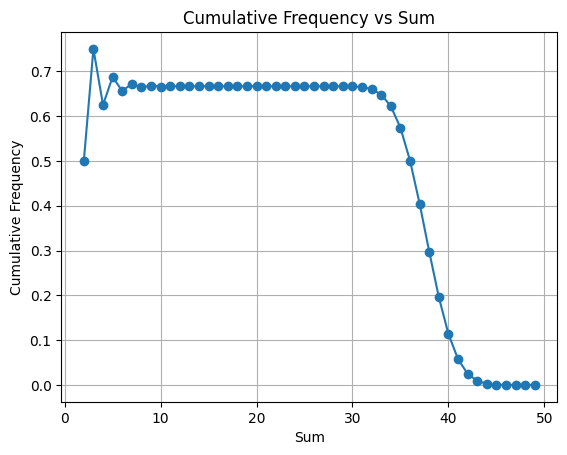

In [39]:
plt.plot(frequencies_df['Sum'], frequencies_df['Probability'],  marker='o', linestyle='-')
plt.xlabel('Sum')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency vs Sum')
plt.grid(True)
plt.show()

In [42]:
def update_frequencies(sequence, frequency):
    cumulative_sum = 0
    for step in sequence:
        cumulative_sum += step
        frequency[cumulative_sum] += 1


def generate_frequencies(num_steps, a, b):
    # Initialize frequency dictionary for all possible sums from 1 to 48
    if a <=0 or  b <= 0:
        min_sum = min(a, b) * num_steps  # Minimum sum if all steps are the smaller value
        max_sum = max(a, b) * num_steps  # Maximum sum if all steps are the larger value
    else:
        min_sum = min(a, b)  # Minimum sum if all steps are the smaller value
        max_sum = max(a, b) * num_steps
    # Initialize frequency dictionary for all possible sums
    frequency = {sum_value: 0 for sum_value in range(min_sum, max_sum + 1)}

    # Start with the sequence of all 2s
    base_sequence = [a] * num_steps
    update_frequencies(base_sequence, frequency)

    # Iteratively introduce 1s and update frequencies
    for num_ones in range(1, num_steps + 1):
        for positions in combinations(range(num_steps), num_ones):
            sequence = base_sequence.copy()
            for pos in positions:
                sequence[pos] = b  # Place 1 at the specified position
            update_frequencies(sequence, frequency)

    return frequency



In [43]:
n = 5
a = 1
b = -1


    Sum  Frequency  Probability
0    -4          1      0.03125
1    -3          2      0.06250
2    -2          9      0.28125
3    -1         16      0.50000
4     0         38      1.18750
5     1         28      0.87500
6     2         38      1.18750
7     3         16      0.50000
8     4          9      0.28125
9     5          2      0.06250
10    6          1      0.03125


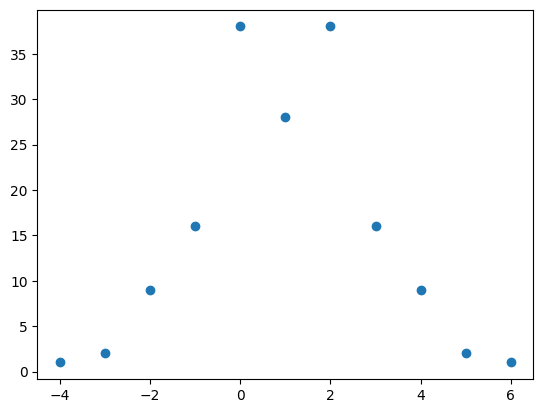

In [44]:
# Generate the frequencies for sequences of length 24
frequencies = generate_frequencies(n,a,b)

# Convert the frequencies dictionary to a pandas DataFrame
frequencies_df = pd.DataFrame(list(frequencies.items()), columns=['Sum', 'Frequency'])
frequencies_df['Sum'] += 1
frequencies_df['Probability'] = frequencies_df['Frequency'] / 2**n
# Display the DataFrame
print(frequencies_df)

plt.scatter(frequencies_df['Sum'], frequencies_df['Frequency'])
plt.show()